# Homework 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problem 1: Visualizing the Breast Cancer Wisconsin Dataset

In [4]:
'Load the Breast Cancer Wisconsin Dataset '
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
labels = pd.Series(cancer.target)

In [5]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This data-set has 30 features like smoothness, radius etc. 
The number of instances are 569 and out of them 212 are malignant and rest are benign. 
The target variables are listed as 0 (malignant) and 1 (benign).

**Part 1:** Scale the features so that they all have mean zero and standard deviation one.

In [6]:
X = data.to_numpy()
y = labels.to_numpy()

In [9]:
X_scaled = (X-np.mean(X,axis=0))/np.std(X,axis=0)

**Part 2:** Use PCA to reduce the dataset down to two dimensions and plot the result using 2 different colors to represent each cell's target class. 
Are the two classes well separated?

In [11]:
'singular value decomposition'
u,s,v = np.linalg.svd(X_scaled) 
'reduce dimension down to 2'
k = 2 # two-dimensional visualization 
X_reduced = X_scaled@v[:k].T

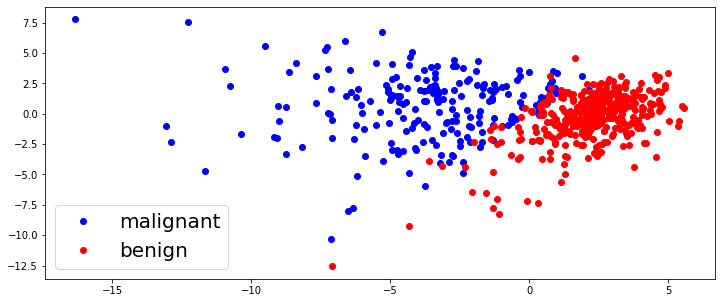

In [13]:
'plot reduced dataset'
colors = ['blue','red']
classes = ['malignant', 'benign']
plt.figure(figsize=(12,5))
for i in range(2):
    plt.plot(X_reduced[y==i,0],X_reduced[y==i,1],'o',c = colors[i], label=classes[i])
    plt.legend(fontsize=20)

## Problem 2: Clustering the MNIST Dataset

In [26]:
'load the first 500 digits from the MNIST Dataset'
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"][:500]
y = mnist["target"][:500].astype(np.uint8)

In [20]:
X.shape

(500, 784)

**Part 1:** Use PCA to reduce the dataset's dimensionality, with an explained variance of 95%. 

Text(0, 0.5, 'explained variance')

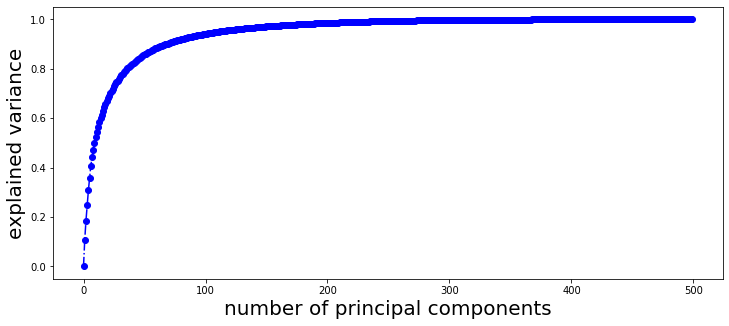

In [27]:
'center dataset'
X_centered = X-np.mean(X,axis=0)
'compute singular value decomposition'
u,s,v = np.linalg.svd(X_centered,full_matrices=False) 
'compute explained variance'
s_squared = np.square(s)
explained_variance = np.array([np.sum(s_squared[:k])/np.sum(np.square(s)) for k in range(500)])
'plot explained variance'
plt.figure(figsize=(12,5))
plt.plot(explained_variance,'bo-.')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('explained variance', fontsize=20)

In [28]:
k_best = 110
explained_variance[110] 

0.9494888267898101

In [29]:
X_reduced = X_centered@v[:k_best].T

**Part 2:** Cluster the digits applying k-means with k=10 on the reduced dataset.

In [6]:
'k means function'
def k_means(X,k,max_it=1000000):   
    it = 0 
    m,n = X.shape #dataset size, number of features
    repeat = True 
    'random initialization of clusters'
    clusters = np.random.randint(k,size=len(X)) # random assignment
    'means initialization'
    means = np.zeros((k,n))
    while repeat and it<=max_it: # repeat until clusters do not change or iterations > max_it
        it = it + 1
        'step 1: update means'
        for i in range(k):
            if len(X[clusters==i])!=0:
                means[i] = np.mean(X[clusters==i],axis=0)
            else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
                idx = np.random.randint(m)
                means[i] = X[idx]
        'step 2: update clusters'
        new_clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)        
        'check whether clusters and new_clusters are equal or not'
        if sum(clusters!=new_clusters)==0:
            repeat = False
        clusters = new_clusters
    return clusters, means

In [30]:
clusters,means = k_means(X_reduced,k=10)

**Part 3:** Visualize the clusters.

Cluster 0


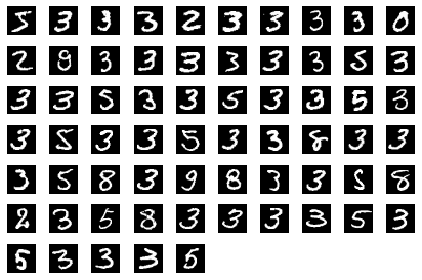

Cluster 1


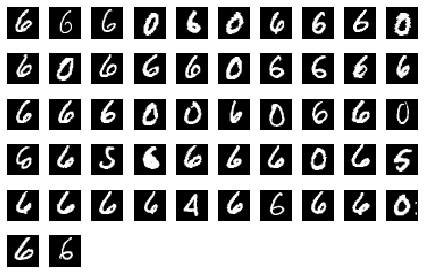

Cluster 2


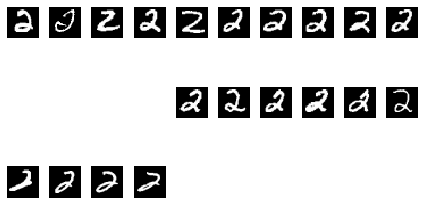

Cluster 3


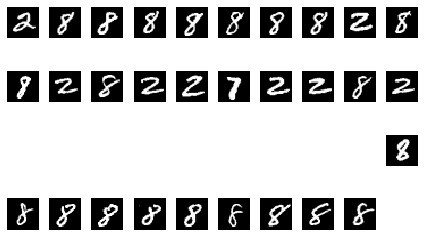

Cluster 4


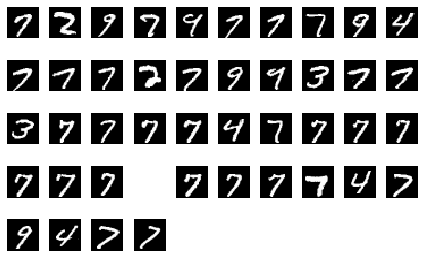

Cluster 5


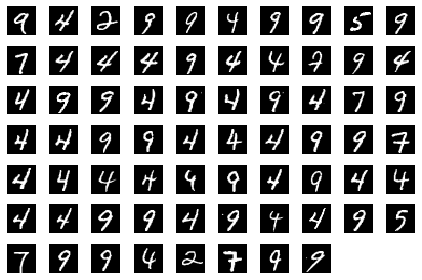

Cluster 6


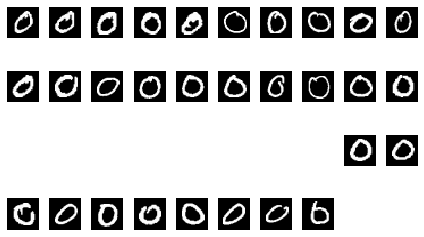

Cluster 7


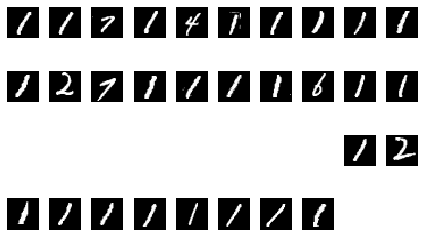

Cluster 8


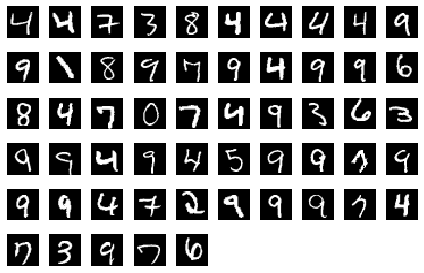

Cluster 9


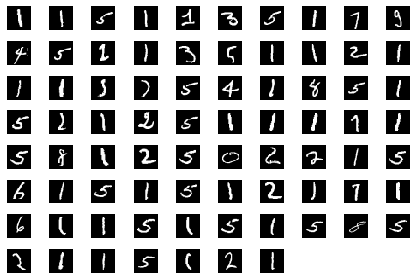

In [31]:
for i in range(10):
    print("Cluster", i)
    n_digits = sum(clusters==i)
    n_cols = 10
    n_rows = (n_digits - 1) // n_cols + 1
    cluster_digits = X[clusters==i]
    #plt.figure(figsize=(10,10))
    for j in range(n_digits):
        digit = cluster_digits[j].reshape(28,28)
        plt.subplot(n_rows, n_cols,j+1)
        plt.imshow(digit,cmap='gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

## Problem 3: Random Projection

Random Projection is another algorithm for dimensionality reduction. 
Like PCA, Random Projection projects the dataset onto a lower-dimensional subspace.
But, unlike in PCA, the subspace (i.e., the matrix v) is chosen at random.

To illustrate Random Projection, we'll use a small subset of the MNIST dataset

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']
X = X[:5000]
y = y[:5000].astype(np.uint8)

We'll focus on digits 0 and 1.

In [39]:
y01 = y[np.logical_or(y == 1, y == 0)]
X01 = X[np.logical_or(y == 1, y == 0)]
X01_centered = X01-np.mean(X01,axis=0) # center the dataset

**Part 1:** Generate two random vectors with length 784.

In [40]:
a = np.random.randn(784)
b = np.random.randn(784)

**Part 2:** Use the Gram-Schmidt process to produce two orthonormal vectors v1 and v2. 
These vectors are the rows of the matrix v.

In [41]:
v1 = a/np.linalg.norm(a)
v2 = b - (b.T@v1)*v1
v2 = v2/np.linalg.norm(v2)

In [42]:
V = np.r_[[v1,v2]]

**Part 3:** Project the dataset onto the subspace spanned by the rows of v.

In [43]:
X01_reduced = X01_centered@V.T

**Part 4:** Plot the result using 2 different colors to represent each digit's target class. Are the two classes well separated?

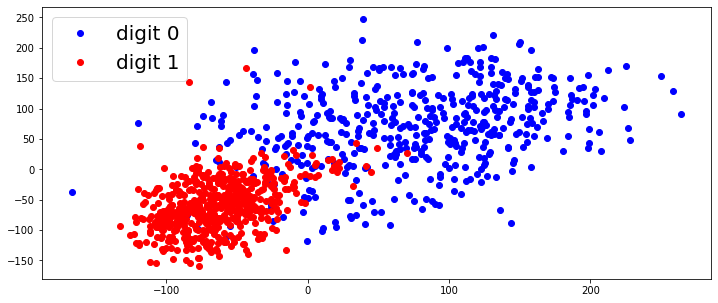

In [47]:
colors = ['blue','red']
plt.figure(figsize=(12,5))
for i in range(2):
    plt.plot(X01_reduced[y01==i,0],X01_reduced[y01==i,1],'o',c = colors[i], label='digit '+str(i))
    plt.legend(fontsize=20)

## Problem 4: A Secret Message 

A (two-dimensional) message has been embedded into a nonlinear three-dimensional surface.

In [48]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/dim_reduction/master/secret%20message'
data = pd.read_csv(url)
X = data.to_numpy()

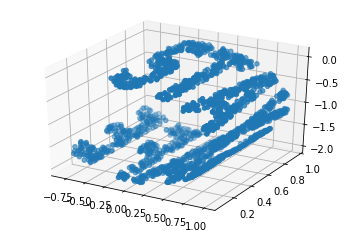

In [49]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

Use LLE to recover the message.

In [50]:
def lle(X,d=2,n_neighbors=5):
    from scipy.spatial import distance
    from scipy.sparse.linalg import eigsh
    from scipy.linalg import solve

    m,n = X.shape
    'step 1: compute pairwise distances and find neighbors'
    print('step 1: computing pairwise distances')
    distances = distance.squareform(distance.pdist(X))        
    index = np.argsort(distances,axis=1)
    neighbors = index[:,1:n_neighbors+1]
    
    'step 2: solve for reconstruction weights'
    print('step 2: computing weights')
    if n_neighbors>m:
        lam = 1e-3
    else:
        lam = 0
    reg = 1e-3
    W = np.zeros((m,m))
    for i in range(m):
        Z = X[neighbors[i]]-X[i]
        C = Z@Z.T
        C = C + reg*np.identity(n_neighbors)*np.linalg.norm(Z)
        w = solve(C,np.ones(n_neighbors),sym_pos=True)
        W[i,neighbors[i]] = w/np.sum(w)


    'step 3: compute embedding from eigenvectors of the matrix (I-W)^T*(I-W)'
    print('step 3: computing new points')
    M = np.identity(m)-W.T-W+W.T@W
    tol = 1e-05
    max_iter=100
    evalues,evectors = eigsh(M, 
                             k=d+1, 
                             sigma = 0, 
                             maxiter = max_iter, 
                             tol = tol)
    index = np.argsort(evalues)
    reduced_X = np.real(evectors[:,index[1:d+1]])
    return reduced_X

In [55]:
Y = lle(X,d=2,n_neighbors=200)

step 1: computing pairwise distances
step 2: computing weights
step 3: computing new points


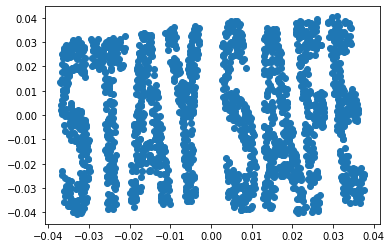

In [56]:
plt.plot(Y[:,0],Y[:,1],'o')

## Problem 5: Those Hyperparameters Really Matter

Let’s start by generating a toy dataset: a dataset of two widely separated clusters. To make things as simple as possible, we’ll consider clusters in a 2D plane.

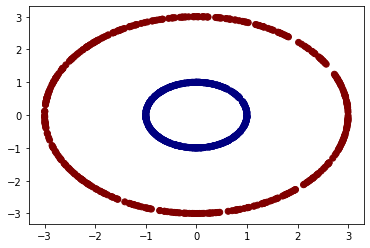

In [49]:
'toy dataset'
m = 500
X = np.zeros((2*m,2))
y = np.zeros(2*m)

theta = 2*np.pi*np.random.randn(m)
# cluster 1
X[:m,0] = np.sin(theta)
X[:m,1] = np.cos(theta)
# cluster 2
X[m:,0] = 3*np.sin(theta)
X[m:,1] = 3*np.cos(theta)
y[m:] = 1

plt.scatter(X[:,0],X[:,1],c=y, cmap='jet')

**Part 1:** Apply t-SNE on the dataset and plot the results for seven different perplexity values: 2, 10, 25, 30, 50, 100, 1000

In [57]:
'tsne function'
def tsne(X, no_dims=2, initial_dims=50, perplexity=30.0, eta=500, max_iter = 1000):
    """
        Runs t-SNE on the dataset to reduce its
        dimensionality to no_dims dimensions. 
        
    Parameters:
    ----------
    
    no_dims (default=2): Dimension of the embedded space
    
    initial_dims (default=50): dimension of the initial PCA dimensionality reduction
    
    perplexity (default=30): The perplexity is related to the number of nearest neighbors. 
                             Consider selecting a value between 5 and 50.
    
    eta (default=500): learning rate
    
    max_iter (default=1000): Gradient Descent iteration
    """
    
    # useful functions 
    from scipy.spatial import distance
    from numpy.linalg import eig
    def pca(X, initial_dims=50):
        """
            Runs PCA on the mxn array X in order to reduce its dimensionality to
            initial_dims dimensions.
        """
        #print("Preprocessing the data using PCA...")
        m, n = X.shape
        X = X - np.mean(X,axis=0) # center X
        _,_,v = np.linalg.svd(X,full_matrices=False)
        Y = X@v[:initial_dims].T
        return Y
    def compute_perplexity(D, beta=1):
        """
            Compute the log-perplexity and the P-column for a specific value of the
            beta = 1/2*sigma**2
        """
        # Compute P-column and corresponding perplexity
        P = np.exp(-D*beta)
        sumP = np.sum(P)
        perplexity = np.log(sumP) + beta*np.sum(D*P)/sumP
        P = P/sumP
        return perplexity, P
    def x2p(X, tol=1e-5, perplexity=30.0):
        """
            Performs a binary search to get P-values in such a way that each
            conditional Gaussian has the same perplexity.
        """
        m,n = X.shape
        # compute all pairwise distances
        D = np.square(distance.squareform(distance.pdist(X)))
        # initialize variables
        P = np.zeros((m, m))
        beta = np.ones((m, 1))
        logU = np.log(perplexity)
        # Compute P matrix
        for i in range(m):
            # interval range
            betamin = -np.inf
            betamax = np.inf
            # Print progress
            #if i % 500 == 0:
            #    print("Computing P-values for point %d of %d..." % (i, m))
                
            # Compute the similarities and perplexity
            idx = np.concatenate((range(0,i),range(i+1,m))).astype('int')
            Di = D[idx,i] 
            Perplexity,P_column = compute_perplexity(Di, beta[i])
            
            # Perform a binary search
            PerplexityDiff = Perplexity - logU
            tries = 0
            while np.abs(PerplexityDiff) > tol and tries < 50:
                if PerplexityDiff > 0:
                    betamin = beta[i].copy()
                    if betamax == np.inf: 
                        beta[i] = beta[i] * 2.
                    else:
                        beta[i] = (beta[i] + betamax) / 2.
                else:
                    betamax = beta[i].copy()
                    if betamin == -np.inf: 
                        beta[i] = beta[i] / 2.
                    else:
                        beta[i] = (beta[i] + betamin) / 2.               
                # Recompute perplexiy
                Perplexity, P_column = compute_perplexity(Di, beta[i])
                PerplexityDiff = Perplexity - logU
                tries += 1
            # Set the final column of P
            P[idx,i] = P_column
        # Return final P-matrix
        #print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
        return P
    
    #################### MAIN FUNCTION ##################
    m,n = X.shape
    # Perform PCA
    X = pca(X, initial_dims)
    # Gradient Descent with Momentum parameters
    initial_momentum = 0.5
    final_momentum = 0.8
    min_gain = 0.01 
    # Initialize variables
    Y = np.random.randn(m, no_dims)
    dY = np.zeros((m, no_dims)) # gradient
    iY = np.zeros((m, no_dims)) # gradient on previous iteration
    gains = np.ones((m, no_dims)) 
    
    # Compute P matrix
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4
    P = np.maximum(P, 1e-12)
    
    # Gradient Descent
    for iter in range(max_iter):
        # Compute pairwise affinities qij
        DY = np.square(distance.squareform(distance.pdist(Y)))
        num = 1/(1+DY)
        np.fill_diagonal(num, 0) #set diagonal entries of num to 0
        Q = num/np.sum(num) # normalize 
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PminusQ = P - Q     
        for i in range(m):
            dY[i] = 4*(PminusQ[:, i] * num[:, i])@(Y[i]-Y)
        
        # Momentum coefficient
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        # Increase or decrease learning rate    
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain 
        
        # Update
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.mean(Y,axis=0) # center the dataset


        # Compute current value of cost function
        #if (iter + 1) % 100 == 0:
        #    cost = np.sum(P * np.log(P / Q))
        #    print("Iteration %d: error is %f" % (iter + 1, cost))
        # Stop early exaggeration    
        if iter == 100: 
            P = P / 4.
    # Return solution 
    return Y

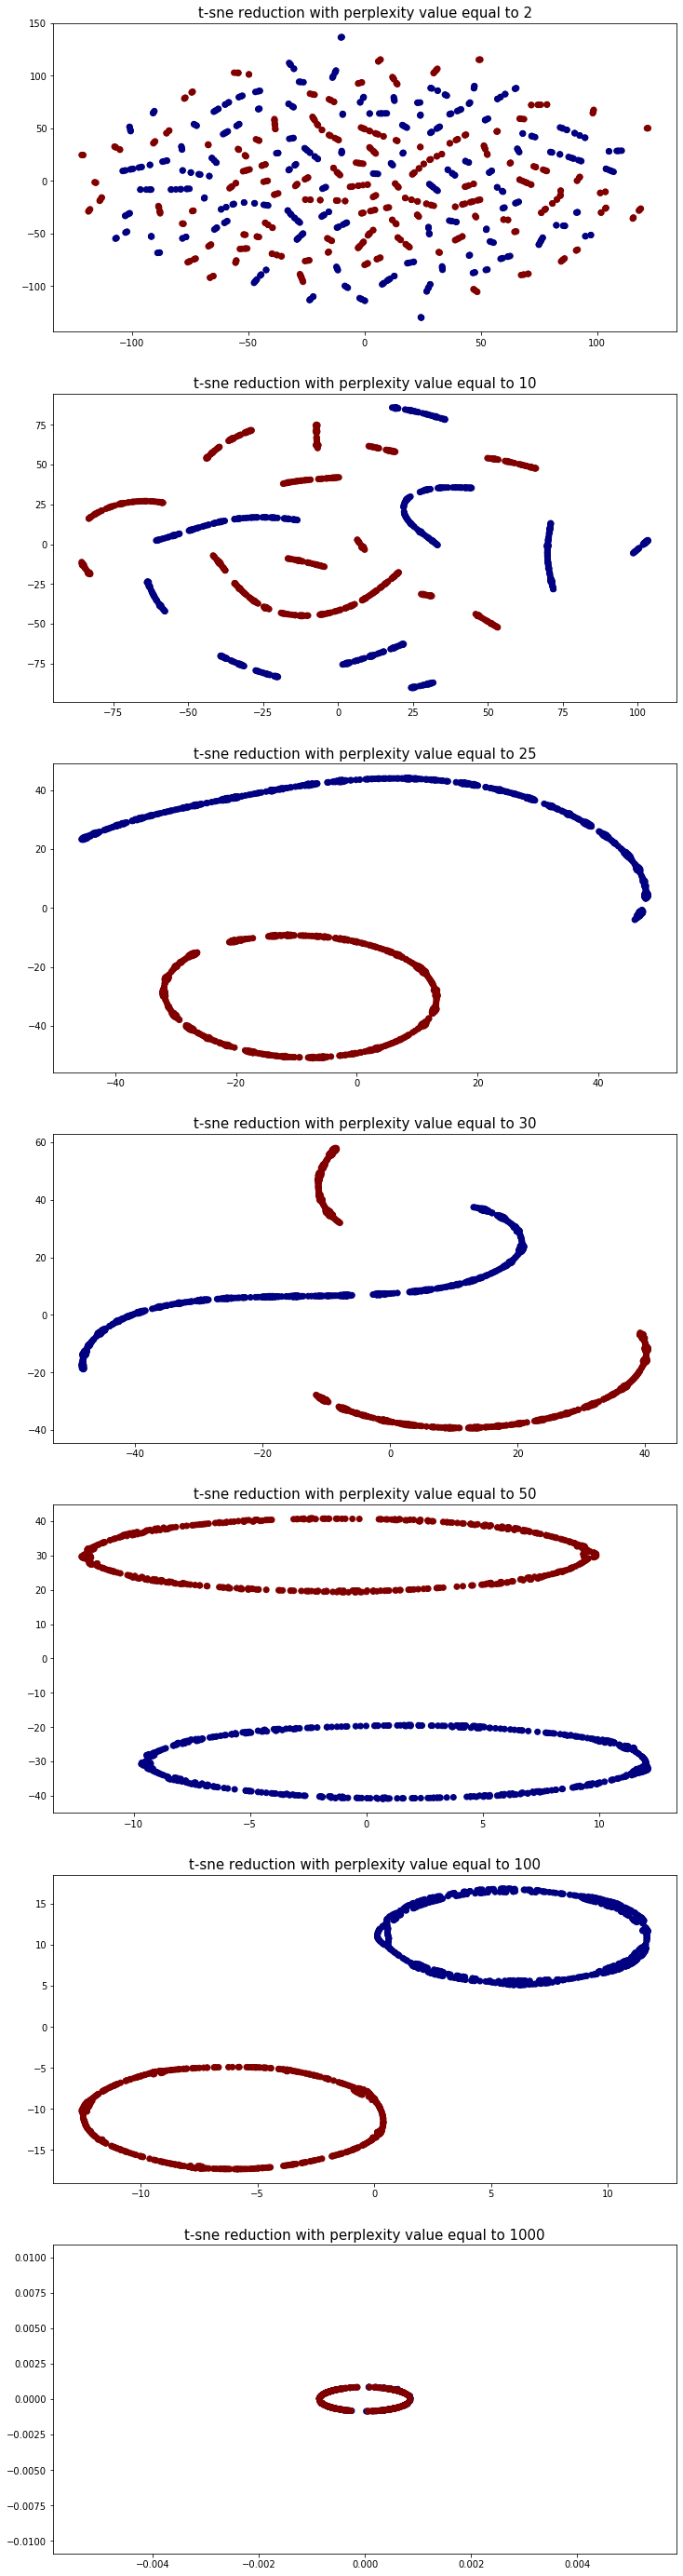

In [66]:
perplexity_values = [2,10,25,30,50,100,1000]
plt.figure(figsize=(12,50))
i=0
for perplexity in perplexity_values:
    i=i+1
    X_reduced = tsne(X,perplexity=perplexity)
    plt.subplot(7,1,i)
    plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y, cmap='jet')
    plt.title('t-sne reduction with perplexity value equal to '+str(perplexity),fontsize=15)

**Part 2:** Fix the perplexity to 50. Apply t-SNE on the dataset and plot the results for seven different max_iter values: 5, 10, 50, 100, 200, 400, 800.

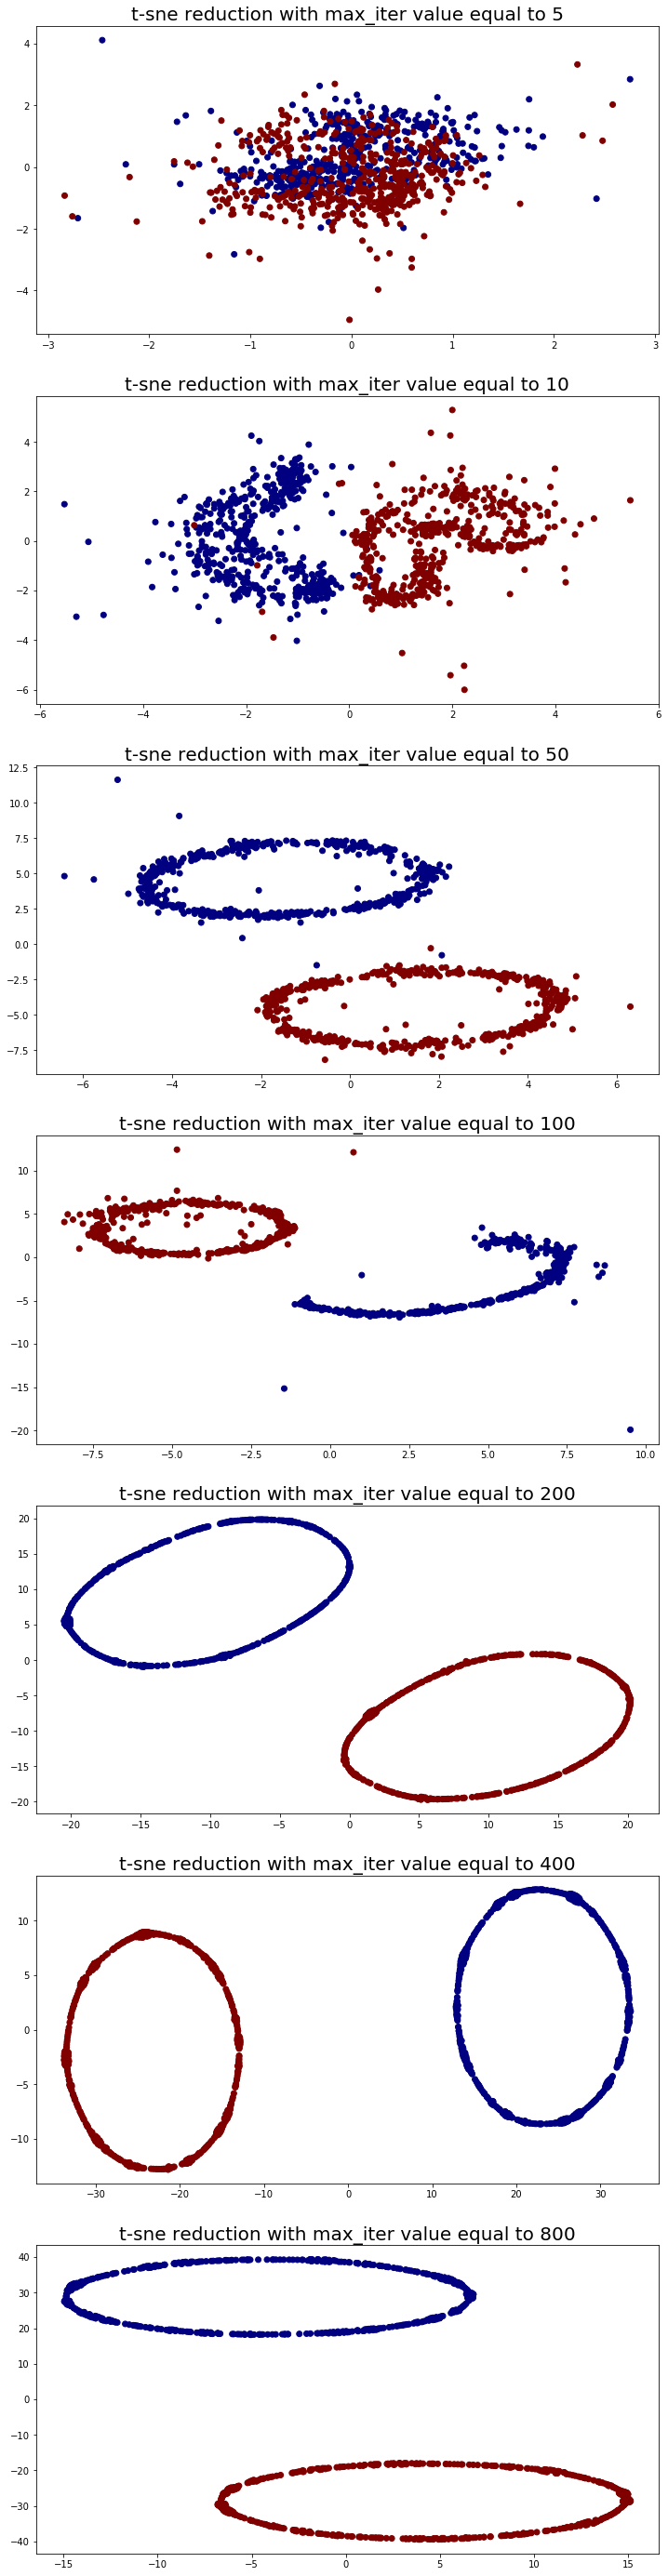

In [67]:
max_iter_values = [5,10,50,100,200,400,800]
perplexity = 50
plt.figure(figsize=(12,50))
i=0
for max_iter in max_iter_values:
    i=i+1
    X_reduced = tsne(X, perplexity=perplexity,max_iter=max_iter)
    plt.subplot(7,1,i)
    plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y, cmap='jet')
    plt.title('t-sne reduction with max_iter value equal to '+str(max_iter),fontsize=20)

## Problem 6: Playing with t-SNE

Load your favorite high-dimensional dataset (for example, the fashion MNist dataset, or the leukimia dataset in HW4, or the labeled faces in the wild dataset in HW5, etc). Use t-SNE to reduce the dataset down to two dimensions and plot the results.

I'll apply t-sne on the leukemia dataset from HW4:

In [77]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtrain'

data = pd.read_csv(url1,sep = '\s+',header = None)
data = data.T

data.head(5) #show first 10 rows of data_train

,0,1,2,3,4,5,6,7,8,9,...,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,-73.0,-69.0,-48.0,13.0,-86.0,-147.0,-65.0,-71.0,-32.0,100.0,...,-134.0,352.0,-67.0,121.0,-5.0,-11.0,-21.0,-41.0,-967.0,-120.0
1,-16.0,-63.0,-97.0,-42.0,-91.0,-164.0,-53.0,-77.0,-17.0,122.0,...,-51.0,244.0,-15.0,119.0,-32.0,4.0,-14.0,-28.0,-205.0,-31.0
2,4.0,-45.0,-112.0,-25.0,-85.0,-127.0,56.0,-110.0,81.0,41.0,...,14.0,163.0,-14.0,7.0,15.0,-8.0,-104.0,-36.0,-245.0,34.0
3,-31.0,-110.0,-20.0,-50.0,-115.0,-113.0,-17.0,-40.0,-17.0,80.0,...,26.0,625.0,18.0,59.0,-10.0,32.0,-2.0,10.0,-495.0,-37.0
4,-33.0,-39.0,-45.0,14.0,-56.0,-106.0,73.0,-34.0,18.0,64.0,...,-69.0,398.0,38.0,215.0,-2.0,44.0,3.0,68.0,-293.0,-34.0


In [78]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancerlabels.ytrain'

labels = pd.read_csv(url1,sep='\s+',header = None)
labels = labels.T

In [79]:
y = labels.to_numpy()
y_leuk = np.zeros((len(y),1))
y_leuk[y==9]=1

In [80]:
X = data.to_numpy()
X_scaled = X/np.max(np.abs(X))

In [91]:
X_reduced = tsne(X_scaled, perplexity=15)

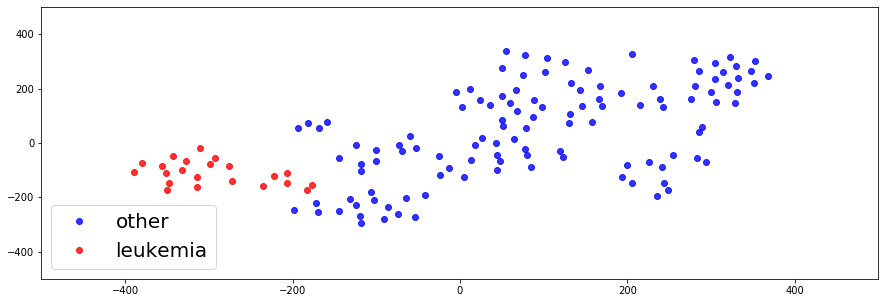

In [97]:
plt.figure(figsize=(15,5))
colors = ['blue','red']
gender = ['other','leukemia']
for i in range(2):
    plt.plot(X_reduced[y_leuk.flatten()==i,0],X_reduced[y_leuk.flatten()==i,1],'o',c=colors[i],alpha=0.8,label=gender[i])
    plt.legend(fontsize=20)
    plt.xlim([-500,500])
    plt.ylim([-500,500])

## Problem 7: The Curse of Dimensionality

Generate $m=1000$ random points in the unit cube of dimension $d$, and compute the largest, smallest and average distance between all pairs of points. Plot the results for dimension values $d=10000,20000,…,100000$.

In [13]:
m = 1000
max_distance = []
min_distance = []
avg_distance = []
for d in range(10000,100000,10000):
    X = np.random.rand(m,d)
    distances = [np.linalg.norm(X[i]-X[j]) for i in range(m) for j in range(i+1,m)]
    max_distance.append(np.max(distances))
    min_distance.append(np.min(distances))
    avg_distance.append(np.mean(distances))

Text(0, 0.5, 'distance')

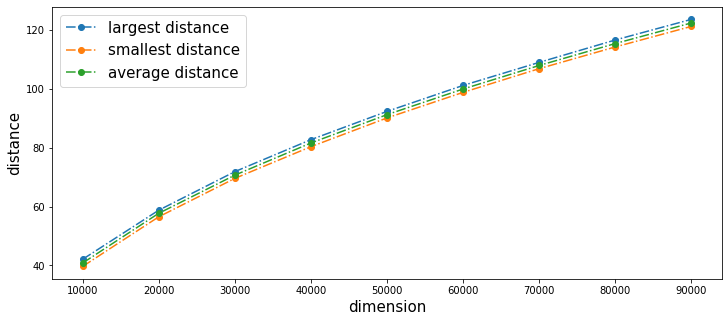

In [22]:
plt.figure(figsize=(12,5))
plt.plot(range(10000,100000,10000),max_distance,'o-.',label = 'largest distance')
plt.plot(range(10000,100000,10000),min_distance,'o-.',label = 'smallest distance')
plt.plot(range(10000,100000,10000),avg_distance,'o-.',label = 'average distance')
plt.legend(fontsize=15)
plt.xlabel('dimension',fontsize=15)
plt.ylabel('distance',fontsize=15)

## Problem 8: Gender Recognition by Voice

The following dataset was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. 
The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.

In [98]:
'load the dataset'
url = 'voice.csv'
data = pd.read_csv(url)
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [38]:
data.shape

(3168, 21)

The following acoustic properties of each voice are measured:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21.  modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of   fundamental frequencies divided by the frequency range

In [99]:
X = data.iloc[:,:20].to_numpy()
y = data.iloc[:,20]

In [40]:
X.shape

(3168, 20)

**Part 1:** Use t-SNE to reduce the dataset down to two dimensions and plot the result using 2 different colors to represent each gender (male/female)

In [100]:
X_scaled = (X-np.mean(X,axis=0))/np.std(X,axis=0)
X_scaled.shape

(3168, 20)

In [101]:
X_reduced = tsne(X_scaled,eta=500,max_iter = 1000, initial_dims=20,perplexity=30.0)

male
female


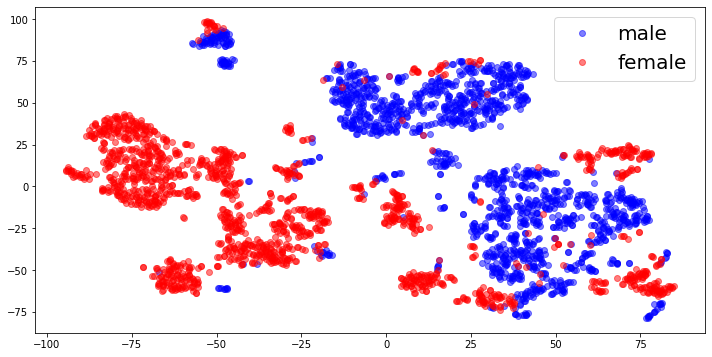

In [105]:
plt.figure(figsize=(12,6))
colors = ['blue','red']
gender = ['male','female']
for i in range(2):
    print(gender[i])
    plt.plot(X_reduced[y==gender[i],0],X_reduced[y==gender[i],1],'o',c=colors[i],alpha=0.5,label=gender[i])
    plt.legend(fontsize=20)

**Part 2:** Try using other dimensionality reduction algorithms such as PCA, LLE or Random Projection and compare the resulting visualizations.

**PCA**

male
female


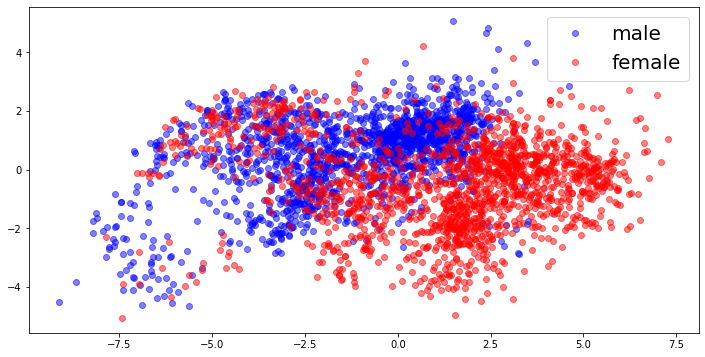

In [107]:
'singular value decomposition'
u,s,v = np.linalg.svd(X_scaled) 
'reduce dimension down to 2'
k = 2 # two-dimensional visualization 
X_reduced = X_scaled@v[:k].T
'plot reduced dataset'
plt.figure(figsize=(12,6))
for i in range(2):
    print(gender[i])
    plt.plot(X_reduced[y==gender[i],0],X_reduced[y==gender[i],1],'o',c=colors[i],alpha=0.5,label=gender[i])
    plt.legend(fontsize=20)

**Random Projection**

male
female


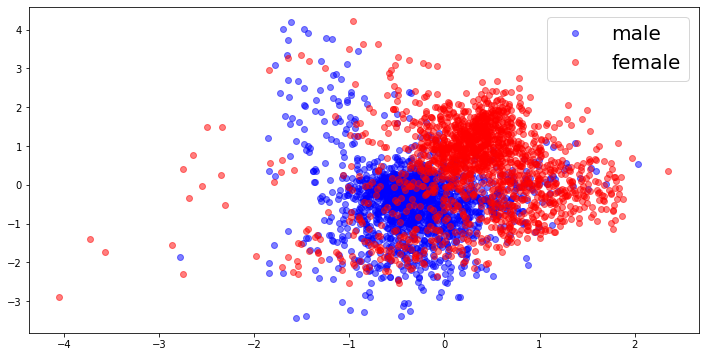

In [114]:
'generate two random vectors'
a = np.random.randn(20)
b = np.random.randn(20)
'orthogonalize the vectors'
v1 = a/np.linalg.norm(a)
v2 = b - (b.T@v1)*v1
v2 = v2/np.linalg.norm(v2)
V = np.r_[[v1,v2]]
'project dataset onto V'
X_reduced = X_scaled@V.T
'plot reduced dataset'
plt.figure(figsize=(12,6))
for i in range(2):
    print(gender[i])
    plt.plot(X_reduced[y==gender[i],0],X_reduced[y==gender[i],1],'o',c=colors[i],alpha=0.5,label=gender[i])
    plt.legend(fontsize=20)

**LLE**

In [115]:
def lle(X,d=2,n_neighbors=5):
    from scipy.spatial import distance
    from scipy.sparse.linalg import eigsh
    from scipy.linalg import solve

    m,n = X.shape
    'step 1: compute pairwise distances and find neighbors'
    print('step 1: computing pairwise distances')
    distances = distance.squareform(distance.pdist(X))        
    index = np.argsort(distances,axis=1)
    neighbors = index[:,1:n_neighbors+1]
    
    'step 2: solve for reconstruction weights'
    print('step 2: computing weights')
    if n_neighbors>m:
        lam = 1e-3
    else:
        lam = 0
    reg = 1e-3
    W = np.zeros((m,m))
    for i in range(m):
        Z = X[neighbors[i]]-X[i]
        C = Z@Z.T
        C = C + reg*np.identity(n_neighbors)*np.linalg.norm(Z)
        w = solve(C,np.ones(n_neighbors),sym_pos=True)
        W[i,neighbors[i]] = w/np.sum(w)


    'step 3: compute embedding from eigenvectors of the matrix (I-W)^T*(I-W)'
    print('step 3: computing new points')
    M = np.identity(m)-W.T-W+W.T@W
    tol = 1e-05
    max_iter=100
    evalues,evectors = eigsh(M, 
                             k=d+1, 
                             sigma = 0, 
                             maxiter = max_iter, 
                             tol = tol)
    index = np.argsort(evalues)
    reduced_X = np.real(evectors[:,index[1:d+1]])
    return reduced_X

In [148]:
X_reduced = lle(X,n_neighbors=100)

step 1: computing pairwise distances
step 2: computing weights
step 3: computing new points


male
female


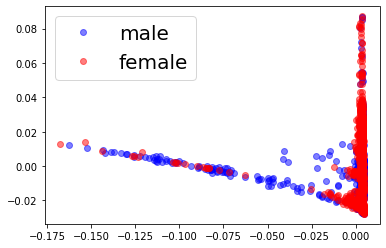

In [149]:
for i in range(2):
    print(gender[i])
    plt.plot(X_reduced[y==gender[i],0],X_reduced[y==gender[i],1],'o',c=colors[i],alpha=0.5,label=gender[i])
    plt.legend(fontsize=20)

## Extra: 

Show that the gradients of the t-SNE cost function are given by:
    
$$
\frac{\partial}{\partial y_i} \mathrm{cost} = 4 \sum_{j=1}^m (p_{ij}- q_{ji})(y_i-y_j)(1+\|y_i-y_j\|_2^2)^{-1}
$$